# 타이타닉

## 전처리

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')
gender_submission = pd.read_csv('./titanic/gender_submission.csv')

In [3]:
print('\n ### 학습 데이터 정보 ### \n')
print(train.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


- 결측치 처리

In [4]:
def fillna(train):
    train['Age'].fillna(train['Age'].mean(), inplace=True)
    train['Cabin'].fillna('N',inplace=True)
    train['Embarked'].fillna('N',inplace=True)
    train['Fare'].fillna(0, inplace=True)
    return train
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
print('Sex distribution:\n',train['Sex'].value_counts())
print('\nCabin distribution:\n',train['Cabin'].value_counts())
print('\nEmbarked distribution:\n',train['Embarked'].value_counts())

Sex distribution:
 male      577
female    314
Name: Sex, dtype: int64

Cabin distribution:
 B96 B98        4
G6             4
C23 C25 C27    4
E101           3
D              3
              ..
C148           1
C49            1
E58            1
B79            1
C101           1
Name: Cabin, Length: 147, dtype: int64

Embarked distribution:
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


- Cabin 전처리

In [6]:
train['Cabin'] = train['Cabin'].str[:1]
train['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

- 성별에 따른 생존 수

In [7]:
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

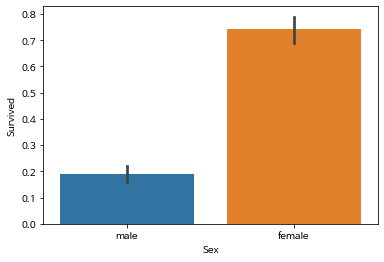

In [8]:
sns.barplot(x='Sex',y='Survived',data=train)

- pclass, sex _ survived

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

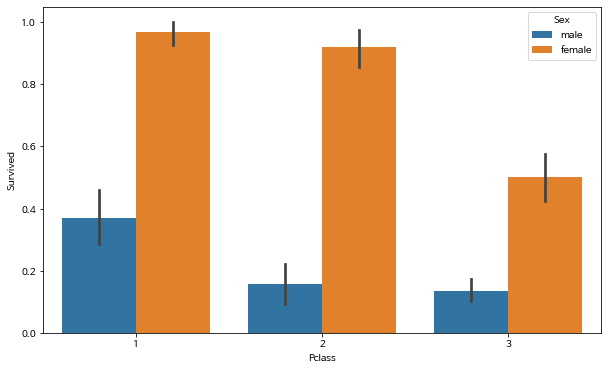

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=train)

- 나이 범주화

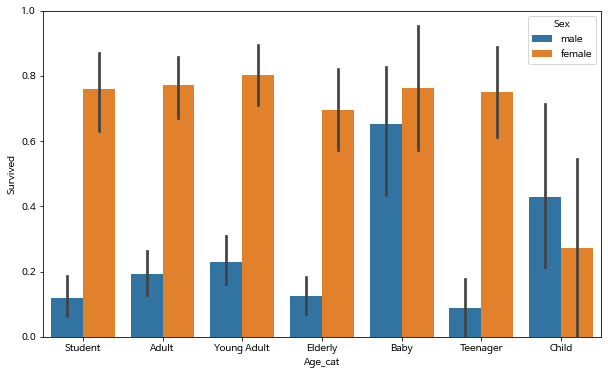

In [10]:
def get_category(age): 
    cat=''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
        
    return cat

plt.figure(figsize=(10,6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

train['Age_cat'] = train['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=train)
train.drop('Age_cat',axis=1,inplace=True)

- 문자열 데이터 인코딩

In [11]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

train = encode_features(train)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,8,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,8,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,8,2


- 함수화

In [12]:
def fillna(train):
    train['Age'].fillna(train['Age'].mean(), inplace=True)
    train['Cabin'].fillna('N',inplace=True)
    train['Embarked'].fillna('N',inplace=True)
    train['Fare'].fillna(0, inplace=True)
    return train

def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

def format_features(dataDF):
    dataDF['Cabin'] = dataDF['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])        
    return dataDF

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [13]:
train = pd.read_csv('./titanic/train.csv')
y = train['Survived']
x = train.drop('Survived',axis=1)

x = transform_features(x)

In [14]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


- train-test split

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)

## 분류 검증

- classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

- 클래스 생성

In [17]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

### 분류 학습

- DecisionTreeClassifier

In [18]:
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
print('DT 정확도:{0:.4f}'.format(accuracy_score(y_test, dt_pred)))

DT 정확도:0.7877


- RandomForestClassifier

In [19]:
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print('RF 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

RF 정확도:0.8547


- LogisticRegression

In [20]:
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print('LR 정확도:{0:.4f}'.format(accuracy_score(y_test, lr_pred)))

LR 정확도:0.8492


### 분류 검증(K-FOLD)

In [21]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count,(train_index, test_index) in enumerate(kfold.split(x)):
        #train-test index 생성
        X_train, X_test = x.values[train_index],x.values[test_index]
        y_train, y_test = y.values[train_index],y.values[test_index]
        
        clf.fit(X_train,y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test,predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count,accuracy))
        
    mean_score = np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))
    
exec_kfold(dt_clf,folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


### cross_val_score  
stratified k-fold 사용

In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf,x,y,cv=5)

for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count,accuracy))
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


### GridSearchCV

In [23]:
from sklearn.model_selection import GridSearchCV
# parameters 는 188p 참고
parameters = {'max_depth':[2,3,5,10], # 트리 최대 깊이 디폴트는 완전 분리 될때까지 키움
              'min_samples_split':[2,3,5], # 오버피팅 막기 위해 노드를 분할하기 위한 최소한의 샘플 데이터 수(몇개 이상 있어야 가지생김)
              'min_samples_leaf':[1,5,8]} # 말단 노드가 되기 위한 최소 샘플 수

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train,y_train)

print('GSCV params:',grid_dclf.best_params_)
print('GSCV acc: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test,dpredictions)
print('Best acc in DT_CLF: {0:.4f}'.format(accuracy))

GSCV params: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GSCV acc: 0.7992
Best acc in DT_CLF: 0.8715
